# Numerical Methods: Gauss-Jacobi and Gauss-Seidel for LSP
    


$$A =\left(\begin{array}{ccc}
10 & 2 & 1\\
1 & 5 & 1\\
2 & 3 & 10 
\end{array}\right)\left(\begin{array}{ccc}
x\\
y\\
z 
\end{array}\right) = \left(\begin{array}{ccc}
7\\
-8\\
6 
\end{array}\right)$$

$$e = 0.001$$

$$I = (0.5, 0.5, 0.5)$$

## 1. Gauss-Seidel

In [95]:
from math import *

# isolando x, y e z

f1 = lambda y,z: (7 - 2*y - z)/10
f2 = lambda x,z: (-8 - x - z)/5
f3 = lambda x,y: (6 - 2*x - 3*y)/10

# chutes iniciais
vetor = [0.5 for i in range(3)]
e = 0.001
max_iter = 7

#listas de convergencia/erro para plotar graficos
num_var=3
conv = [[vetor[i]] for i in range(num_var)]
mse=[]

for i in range(max_iter):
    
    novo_vetor = [f1(vetor[1],vetor[2]), 
                  f2(f1(vetor[1],vetor[2]),vetor[2]), 
                  f3(f1(vetor[1],vetor[2]),f2(f1(vetor[1],vetor[2]),vetor[2]))]
    
    print('%d\t%0.4f\t%0.4f\t%0.4f' %(i, novo_vetor[0],novo_vetor[1],novo_vetor[2]))
    
    #calcula o erro
    erro=[]
    for k in range(len(vetor)):
        erro.append(vetor[k]-novo_vetor[k])

    #adiciona erro quadratico medio na lista mse
    mse.append(sum([j**2 for j in erro]))
    
    # atribui os novos valores às variaveis
    for j,k in enumerate(novo_vetor):
        vetor[j]=k
        conv[j].append(k)
        
    # verifica se o criterio de parada foi satisfeito
    if e>erro[0] and e>erro[1] and e>erro[2]:
        break
    
print("\n \n Solução do sistema: ", [k for k in novo_vetor])

print("\n \n Erro Quadrático Médio MSE: ", mse[-1])


0	0.5500	-1.8100	1.0330
1	0.9587	-1.9983	1.0078
2	0.9989	-2.0013	1.0006
3	1.0002	-2.0002	1.0000

 
 Solução do sistema:  [1.0002040652, -2.00016498664, 1.000008682952]

 
 Erro Quadrático Médio MSE:  3.455838015009906e-06


### 1.1 Convergence and mean squared error graphs

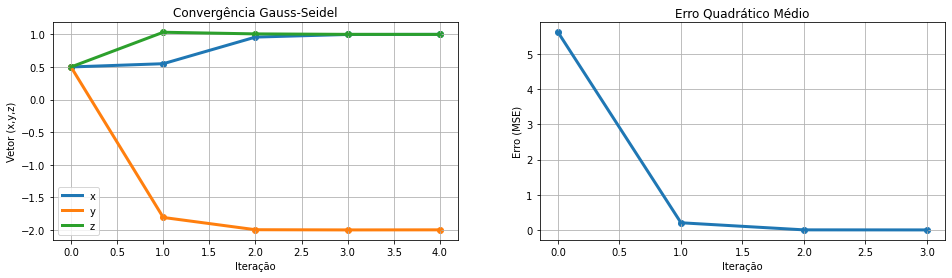

In [96]:
figure, axis = plt.subplots(1, 2, figsize=(16,4))

#grafico de convergencia
axis[0].plot(range(len(conv[0])), conv[0], linewidth=3)
axis[0].plot(range(len(conv[1])),conv[1], linewidth=3)
axis[0].plot(range(len(conv[2])),conv[2], linewidth=3)
axis[0].set_title("Convergência Gauss-Seidel")
axis[0].scatter(range(len(conv[0])), conv[0])
axis[0].scatter(range(len(conv[1])),conv[1])
axis[0].scatter(range(len(conv[2])),conv[2])
axis[0].legend(['x','y','z'])
axis[0].set_xlabel("Iteração")
axis[0].set_ylabel("Vetor (x,y,z)")
axis[0].grid()
#grafico do erro
axis[1].plot(range(len(mse)), mse, linewidth=3)
axis[1].scatter(range(len(mse)), mse)
axis[1].set_title("Erro Quadrático Médio")
axis[1].set_xlabel("Iteração")
axis[1].set_ylabel("Erro (MSE)")
axis[1].grid()

plt.show() 

## 2. Gauss-Jacobi

In [97]:
from math import *

# isolando x, y e z

f1 = lambda y,z: (7 - 2*y - z)/10
f2 = lambda x,z: (-8 - x - z)/5
f3 = lambda x,y: (6 - 2*x - 3*y)/10

# chutes iniciais
vetor = [0.5 for i in range(3)]
e = 0.001
max_iter = 10

#listas de convergencia/erro para plotar graficos
num_var=3
conv = [[vetor[i]] for i in range(num_var)]
mse=[]

for i in range(max_iter):
    
    novo_vetor = [f1(vetor[1],vetor[2]), 
                  f2(vetor[0], vetor[2]), 
                  f3(vetor[0],vetor[1])]
    
    print('%d\t%0.4f\t%0.4f\t%0.4f' %(i, novo_vetor[0],novo_vetor[1],novo_vetor[2]))
    
    #calcula o erro
    erro=[]
    for k in range(len(vetor)):
        erro.append(abs(vetor[k]-novo_vetor[k]))

    #adiciona erro quadratico medio na lista mse
    mse.append(sum([j**2 for j in erro]))
    
    # atribui os novos valores às variaveis
    for j,k in enumerate(novo_vetor):
        vetor[j]=k
        conv[j].append(k)
        
    # verifica se o criterio de parada foi satisfeito
    if erro[0]<e and erro[1]<e and erro[2]<e:
        break
    
print("\n \n Solução do sistema: ", [k for k in novo_vetor])

print("\n \n Erro Quadrático Médio MSE: ", mse[-1])


0	0.5500	-1.8000	0.3500
1	1.0250	-1.7800	1.0300
2	0.9530	-2.0110	0.9290
3	1.0093	-1.9764	1.0127
4	0.9940	-2.0044	0.9911
5	1.0018	-1.9970	1.0025
6	0.9992	-2.0009	0.9987
7	1.0003	-1.9996	1.0004
8	0.9999	-2.0001	0.9998

 
 Solução do sistema:  [0.9998732839999999, -2.000144812, 0.9998146760000001]

 
 Erro Quadrático Médio MSE:  8.735698864960092e-07


### 2.1 Convergence and mean squared error graphs

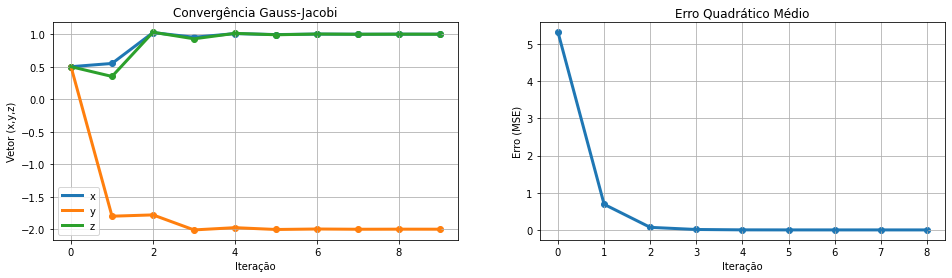

In [98]:
figure, axis = plt.subplots(1, 2, figsize=(16,4))

#grafico de convergencia
axis[0].plot(range(len(conv[0])), conv[0], linewidth=3)
axis[0].plot(range(len(conv[1])),conv[1], linewidth=3)
axis[0].plot(range(len(conv[2])),conv[2], linewidth=3)
axis[0].set_title("Convergência Gauss-Jacobi")
axis[0].scatter(range(len(conv[0])), conv[0])
axis[0].scatter(range(len(conv[1])),conv[1])
axis[0].scatter(range(len(conv[2])),conv[2])
axis[0].legend(['x','y','z'])
axis[0].set_xlabel("Iteração")
axis[0].set_ylabel("Vetor (x,y,z)")
axis[0].grid()
#grafico do erro
axis[1].plot(range(len(mse)), mse, linewidth=3)
axis[1].scatter(range(len(mse)), mse)
axis[1].set_title("Erro Quadrático Médio")
axis[1].set_xlabel("Iteração")
axis[1].set_ylabel("Erro (MSE)")
axis[1].grid()

plt.show() 

## 3. Testing another LSP with Gauss-Seidel



$$\left(\begin{array}{ccc}
10 & 2 & 3\\
5 & 10 & 4\\
2 & 3 & 8 
\end{array}\right)\left(\begin{array}{ccc}
x\\
y\\
z 
\end{array}\right) = \left(\begin{array}{ccc}
60\\
100\\
99 
\end{array}\right)$$


In [101]:
from math import *

# isolando x, y e z

#10 2 3 60
#5 10 4 100
#2 3 8 99

f1 = lambda y,z: (60 - 2*y - 3*z)/10
f2 = lambda x,z: (100 - 5*x - 4*z)/10
f3 = lambda x,y: (99 - 2*x - 3*y)/8

# chutes iniciais
vetor = [0.5 for i in range(3)]
e = 0.001
max_iter = 7

#listas de convergencia/erro para plotar graficos
num_var=3
conv = [[vetor[i]] for i in range(num_var)]
mse=[]

for i in range(max_iter):
    
    novo_vetor = [f1(vetor[1],vetor[2]), 
                  f2(f1(vetor[1],vetor[2]),vetor[2]), 
                  f3(f1(vetor[1],vetor[2]),f2(f1(vetor[1],vetor[2]),vetor[2]))]
    
    print('%d\t%0.4f\t%0.4f\t%0.4f' %(i, novo_vetor[0],novo_vetor[1],novo_vetor[2]))
    
    #calcula o erro
    erro=[]
    for k in range(len(vetor)):
        erro.append(vetor[k]-novo_vetor[k])

    #adiciona erro quadratico medio na lista mse
    mse.append(sum([j**2 for j in erro]))
    
    # atribui os novos valores às variaveis
    for j,k in enumerate(novo_vetor):
        vetor[j]=k
        conv[j].append(k)
        
    # verifica se o criterio de parada foi satisfeito
    #if erro[0]<e and erro[1]<e and erro[2]<e:
        #break
    
print("\n \n Solução do sistema: ", [k for k in novo_vetor])

print("\n \n Erro Quadrático Médio MSE: ", mse[-1])


0	5.7500	6.9250	8.3406
1	2.1128	5.6073	9.7440
2	1.9553	5.1247	9.9644
3	1.9857	5.0214	9.9956
4	1.9971	5.0032	9.9995
5	1.9995	5.0004	10.0000
6	1.9999	5.0001	10.0000

 
 Solução do sistema:  [1.9999231286351768, 5.000054827988561, 9.999998657345497]

 
 Erro Quadrático Médio MSE:  3.375912571193362e-07


### 3.1 Convergence and mean squared error graphs

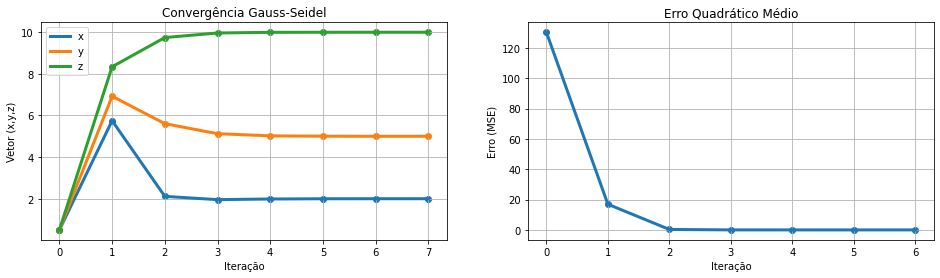

In [102]:
figure, axis = plt.subplots(1, 2, figsize=(16,4))

#grafico de convergencia
axis[0].plot(range(len(conv[0])), conv[0], linewidth=3)
axis[0].plot(range(len(conv[1])),conv[1], linewidth=3)
axis[0].plot(range(len(conv[2])),conv[2], linewidth=3)
axis[0].set_title("Convergência Gauss-Seidel")
axis[0].scatter(range(len(conv[0])), conv[0])
axis[0].scatter(range(len(conv[1])),conv[1])
axis[0].scatter(range(len(conv[2])),conv[2])
axis[0].legend(['x','y','z'])
axis[0].set_xlabel("Iteração")
axis[0].set_ylabel("Vetor (x,y,z)")
axis[0].grid()
#grafico do erro
axis[1].plot(range(len(mse)), mse, linewidth=3)
axis[1].scatter(range(len(mse)), mse)
axis[1].set_title("Erro Quadrático Médio")
axis[1].set_xlabel("Iteração")
axis[1].set_ylabel("Erro (MSE)")
axis[1].grid()

plt.show() 